# Pandas Pivot_table() Implementation

# Student Behavioral Dataset

About Dataset

Student Performance & Behavior Dataset

* This dataset is real data of 5,000 records collected from a private learning provider.
* The dataset includes key attributes necessary for exploring patterns, correlations, and insights related to academic performance.

Columns:

* Student_ID: Unique identifier for each student.
* First_Name: Student’s first name.
* Last_Name: Student’s last name.
* Email: Contact email (can be anonymized).
* Gender: Male, Female, Other.
* Age: The age of the student.
* Department: Student's department (e.g., CS, Engineering, Business).
* Attendance (%): Attendance percentage (0-100%).
* Midterm_Score: Midterm exam score (out of 100).
* Final_Score: Final exam score (out of 100).
* Assignments_Avg: Average score of all assignments (out of 100).
* Quizzes_Avg: Average quiz scores (out of 100).
* Participation_Score: Score based on class participation (0-10).
* Projects_Score: Project evaluation score (out of 100).
* Total_Score: Weighted sum of all grades.
* Grade: Letter grade (A, B, C, D, F).
* Study_Hours_per_Week: Average study hours per week.
* Extracurricular_Activities: Whether the student participates in extracurriculars (Yes/No).
* Internet_Access_at_Home: Does the student have access to the internet at home? (Yes/No).
* Parent_Education_Level: Highest education level of parents (None, High School, Bachelor's, Master's, PhD).
* Family_Income_Level: Low, Medium, High.
* Stress_Level (1-10): Self-reported stress level (1: Low, 10: High).
* Sleep_Hours_per_Night: Average hours of sleep per night.

The Attendance is not part of the Total_Score or has very minimal weight.

Calculating the weighted sum:

Total Score=a⋅Midterm+b⋅Final+c⋅Assignments+d⋅Quizzes+e⋅Participation+f⋅Projects

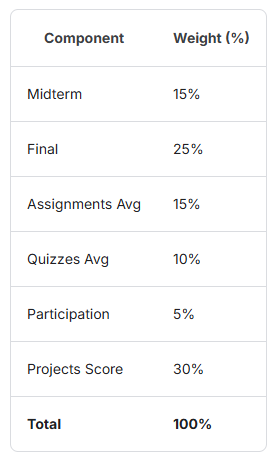

Dataset contains:

* Missing values (nulls): in some records (e.g., Attendance, Assignments, or Parent Education Level).
* Bias in some Datae (ex: grading e.g., students with high attendance get slightly better grades).
* Imbalanced distributions (e.g., some departments having more students).

# 1. Import the dataset

In [1]:
import pandas as pd

student = pd.read_csv('Students Performance Dataset.csv')

In [2]:
student.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [4]:
student.shape

(5000, 23)

# 2. Pivot_table() method

The pivot_table() method in Pandas is a highly versatile tool used to summarize and reshape data from a "long" format into a "wide" format. It's essentially a more powerful and flexible version of pivot(), specifically designed to handle aggregation of numeric data when there are duplicate entries for the combinations of index and columns.

Syntax


DataFrame.pivot_table(
  
    values=None,
    index=None,
    columns=None,
    aggfunc='mean', # Default aggregation function
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    # ... other less common parameters
)

Precise Breakdown of pivot_table() Parameters:

values (optional):

* The column (or list of columns) whose values will be used to populate the cells of the new table. These are the values that will be aggregated.
* If not specified, pivot_table() will attempt to aggregate all numeric columns.

index (optional):

* The column (or list of columns) whose unique values will form the new DataFrame's index (rows).
* You can pass a single column name or a list of column names to create a MultiIndex.

columns (optional):

* The column (or list of columns) whose unique values will form the new DataFrame's columns.
* You can pass a single column name or a list of column names to create a MultiIndex for the columns.

aggfunc (optional, defaults to 'mean'):

* This is the most crucial parameter that differentiates pivot_table() from pivot().
* It specifies the aggregation function to apply when there are multiple values for a given (index, columns) cell.
* Can be a single function (e.g., 'mean', 'sum', 'count', np.min, len), a list of functions (e.g., ['mean', 'sum']), or a dictionary mapping values columns to specific functions (e.g., {'Total_Score': 'mean', 'Attendance (%)': 'max'}).

fill_value (optional):

* Value to replace missing values (NaNs) in the pivoted table. If a particular (index, columns) combination doesn't exist in the original data, its cell will be filled with NaN by default. fill_value allows you to specify a different replacement (e.g., 0).

margins (optional, defaults to False):

* If True, adds row/column subtotals/grand totals.

dropna (optional, defaults to True):

* Do not include columns whose entries are all NaN. If True, columns with all NaN values will be dropped.

How it Works:

* Grouping: It implicitly groups the data based on the combinations of index and columns.
* Aggregation: For each unique (index, columns) combination, it gathers all corresponding values and applies the specified aggfunc (e.g., calculates their mean).
* Reshaping: It then arranges these aggregated results into a new "wide" table format, with index as rows and columns as new columns.

When pivot_table() is Essential:

* When aggregation is needed: This is its primary use case. If you need to summarize multiple data points into a single cell (e.g., average, sum, count).
Handling duplicate index-columns combinations: If your raw data has multiple rows that would map to the same cell in the pivoted table (e.g., several students in the 'CS' department are male, and you want their average score), pivot_table() handles this gracefully through aggfunc.
* Creating cross-tabulations: Useful for generating summary tables that show relationships between two or more categorical variables and a numerical variable.
* Flexible data exploration: Its various parameters (aggfunc, fill_value, margins) make it a powerful tool for flexible data exploration and reporting.

# 3. Data insights leveraging Pivot_table()

* For each Department, what are the Average_Assignments_Avg and Average_Quizzes_Avg broken down by Extracurricular_Activities status?
* How does Study_Hours_per_Week vary for each Parent_Education_Level across different Genders?

### A. For each Department, what are the Average_Assignments_Avg and Average_Quizzes_Avg broken down by Extracurricular_Activities status?

In [14]:
# Use pivot_table to calculate the average Assignments_Avg and Quizzes_Avg
# for each Department broken down by Extracurricular_Activities status.
# 'index' will be the rows (Department).
# 'columns' will be the new columns (Extracurricular_Activities status).
# 'values' specifies the columns whose data will be aggregated.
# 'aggfunc' specifies the aggregation function (default is 'mean', but stated explicitly for clarity).

pivot_department_scores_by_extracurriculars = student.pivot_table(
    index='Department',
    columns='Extracurricular_Activities',
    values=['Assignments_Avg', 'Quizzes_Avg'],
    aggfunc='mean'
)

pivot_department_scores_by_extracurriculars

Assignments_Avg            Quizzes_Avg           
Extracurricular_Activities              No        Yes          No        Yes
Department                                                                  
Business                         74.733848  74.895415   76.412749  75.263790
CS                               75.403109  74.812667   74.565272  74.602341
Engineering                      75.404344  74.685601   73.712010  74.940183
Mathematics                      75.356080  74.443590   75.402178  73.757103

### B. How does Study_Hours_per_Week vary for each Parent_Education_Level across different Genders?

In [15]:
# Use pivot_table to calculate the average Study_Hours_per_Week
# for each Parent_Education_Level broken down by Gender.
# 'index' will be the rows (Parent_Education_Level).
# 'columns' will be the new columns (Gender values).
# 'values' specifies the column whose data will be aggregated.
# 'aggfunc' specifies the aggregation function (default is 'mean').

pivot_study_hours = student.pivot_table(
    index='Parent_Education_Level',
    columns='Gender',
    values='Study_Hours_per_Week',
    aggfunc='mean' # Explicitly stating mean, which is the default
)

pivot_study_hours

Gender,Female,Male
Parent_Education_Level,,
Bachelor's,17.653722,17.912428
High School,17.635593,17.358599
Master's,17.595885,17.005837
PhD,17.499189,17.873410


# Key Insights

pivot_table() is essential in Pandas when you need to reshape your data (from long to wide format) and, crucially, aggregate numerical values simultaneously.

It becomes indispensable in the following scenarios:

* When your index and columns combinations are NOT unique: This is the most common reason. If, for a given row (index) and column header (columns), there are multiple values you want to put into a single cell, pivot_table() uses an aggregation function (like mean, sum, count, etc.) to combine these values. In contrast, pivot() would raise an error in this situation.
* When you need to perform summary statistics (aggregation) during reshaping: You're not just reorganizing data; you're also calculating statistics like averages, totals, counts, minimums, maximums, or standard deviations for each new cell.
* To handle missing combinations gracefully: By default, pivot_table() fills in NaN for combinations of index and columns that don't exist in the original data, and you can specify a fill_value to replace these NaNs.
* For more complex multi-level analysis: It offers more flexibility with index, columns, values, and aggfunc arguments, allowing for sophisticated multi-level summaries and cross-tabulations that go beyond simple reshaping.

In essence, if your reshaping task involves consolidating multiple data points into a single summary value per cell, pivot_table() is the tool you must use.

# COMPLETED